In [62]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings('ignore')

In [79]:
COLORS = dict(
    [
        ("bluish_green", "#00C25E"),
        ("blue", "#0072BC"),
        ("orange", "#F39800"),
    ]
)

In [80]:
def select_metric(df, metric):
    "Select a metric such as 'correlation', 'p-val' or 'rmse'."
    return df.loc[:, pd.Series(df.columns).apply(lambda s: s.split('_')[0] == metric).values]

def select_fold(df, fold):
    "Select a fold such as '0', '1' or '2'."
    return df.loc[:, pd.Series(df.columns).apply(lambda s: s.split('_')[-1] == fold).values]

In [94]:
# Specify path to the folder where results are stored
PATH_TO_RESULTS = Path("")
PATH_TO_BENCHMARK_RESULTS = Path("")

In [95]:
# Load experiment results

exp_name = "miso_her2st"

df_results_test = pd.read_csv(PATH_TO_RESULTS / exp_name / f"metrics.csv")
mean_cv_gene = pd.concat(
    [
        select_metric(
            select_fold(df_results_test.set_index('gene'), str(i)),
            'correlation-pearson'
        ).mean(axis=1) for i in range(5)
    ],
    axis=1
).mean(axis=1)
df = pd.DataFrame(mean_cv_gene)
df['model'] = 'MISO'
df.rename(columns={0: 'correlation'}, inplace=True)

In [96]:
# Load benchmark data

df_comp = pd.read_excel(
    PATH_TO_BENCHMARK_RESULTS / '41467_2025_56618_MOESM4_ESM.xlsx',
    sheet_name='Fig3a'
)

mapping = {
    'GBP\xa01.00': 'GBP1',
    'GBP\xa02.00': 'GBP2',
    'GBP\xa03.00': 'GBP3',
    'GBP\xa04.00': 'GBP4',
    'GBP\xa05.00': 'GBP5',
    'HLA.B': 'HLA-B',
    'HLA.DMA': 'HLA-DMA',
    'HLA.DMB': 'HLA-DMB',
    'HLA.DOA': 'HLA-DOA',
    'HLA.DPA1': 'HLA-DPA1',
    'HLA.DPB1': 'HLA-DPB1',
    'HLA.DRA': 'HLA-DRA',
    'HLA.DRB1': 'HLA-DRB1',
    'SOS\xa02': 'SOS2'
}

df_comp.loc[df_comp['gene'].isin(mapping.keys()), 'gene'] = df_comp.loc[
    df_comp['gene'].isin(mapping.keys()), 'gene'
].map(mapping)

df_comp = df_comp.loc[df_comp['metric'] == 'PCC']
df_comp = df_comp[['gene', 'model_id', 'value', 'gene_set']].rename(
    columns={'model_id': 'model', 'value': 'correlation'}
)

In [97]:
df_hvgs = df.loc[df_comp.loc[df_comp['gene_set'] == 'HVGs', 'gene'].unique()]
df_hvgs['gene_set'] = 'HVGs'
df_svgs = df.loc[df_comp.loc[df_comp['gene_set'] == 'SVGs', 'gene'].unique()]
df_svgs['gene_set'] = 'SVGs'
df['gene_set'] = 'All Genes'

In [98]:
df = pd.concat([df, df_hvgs, df_svgs, df_comp])

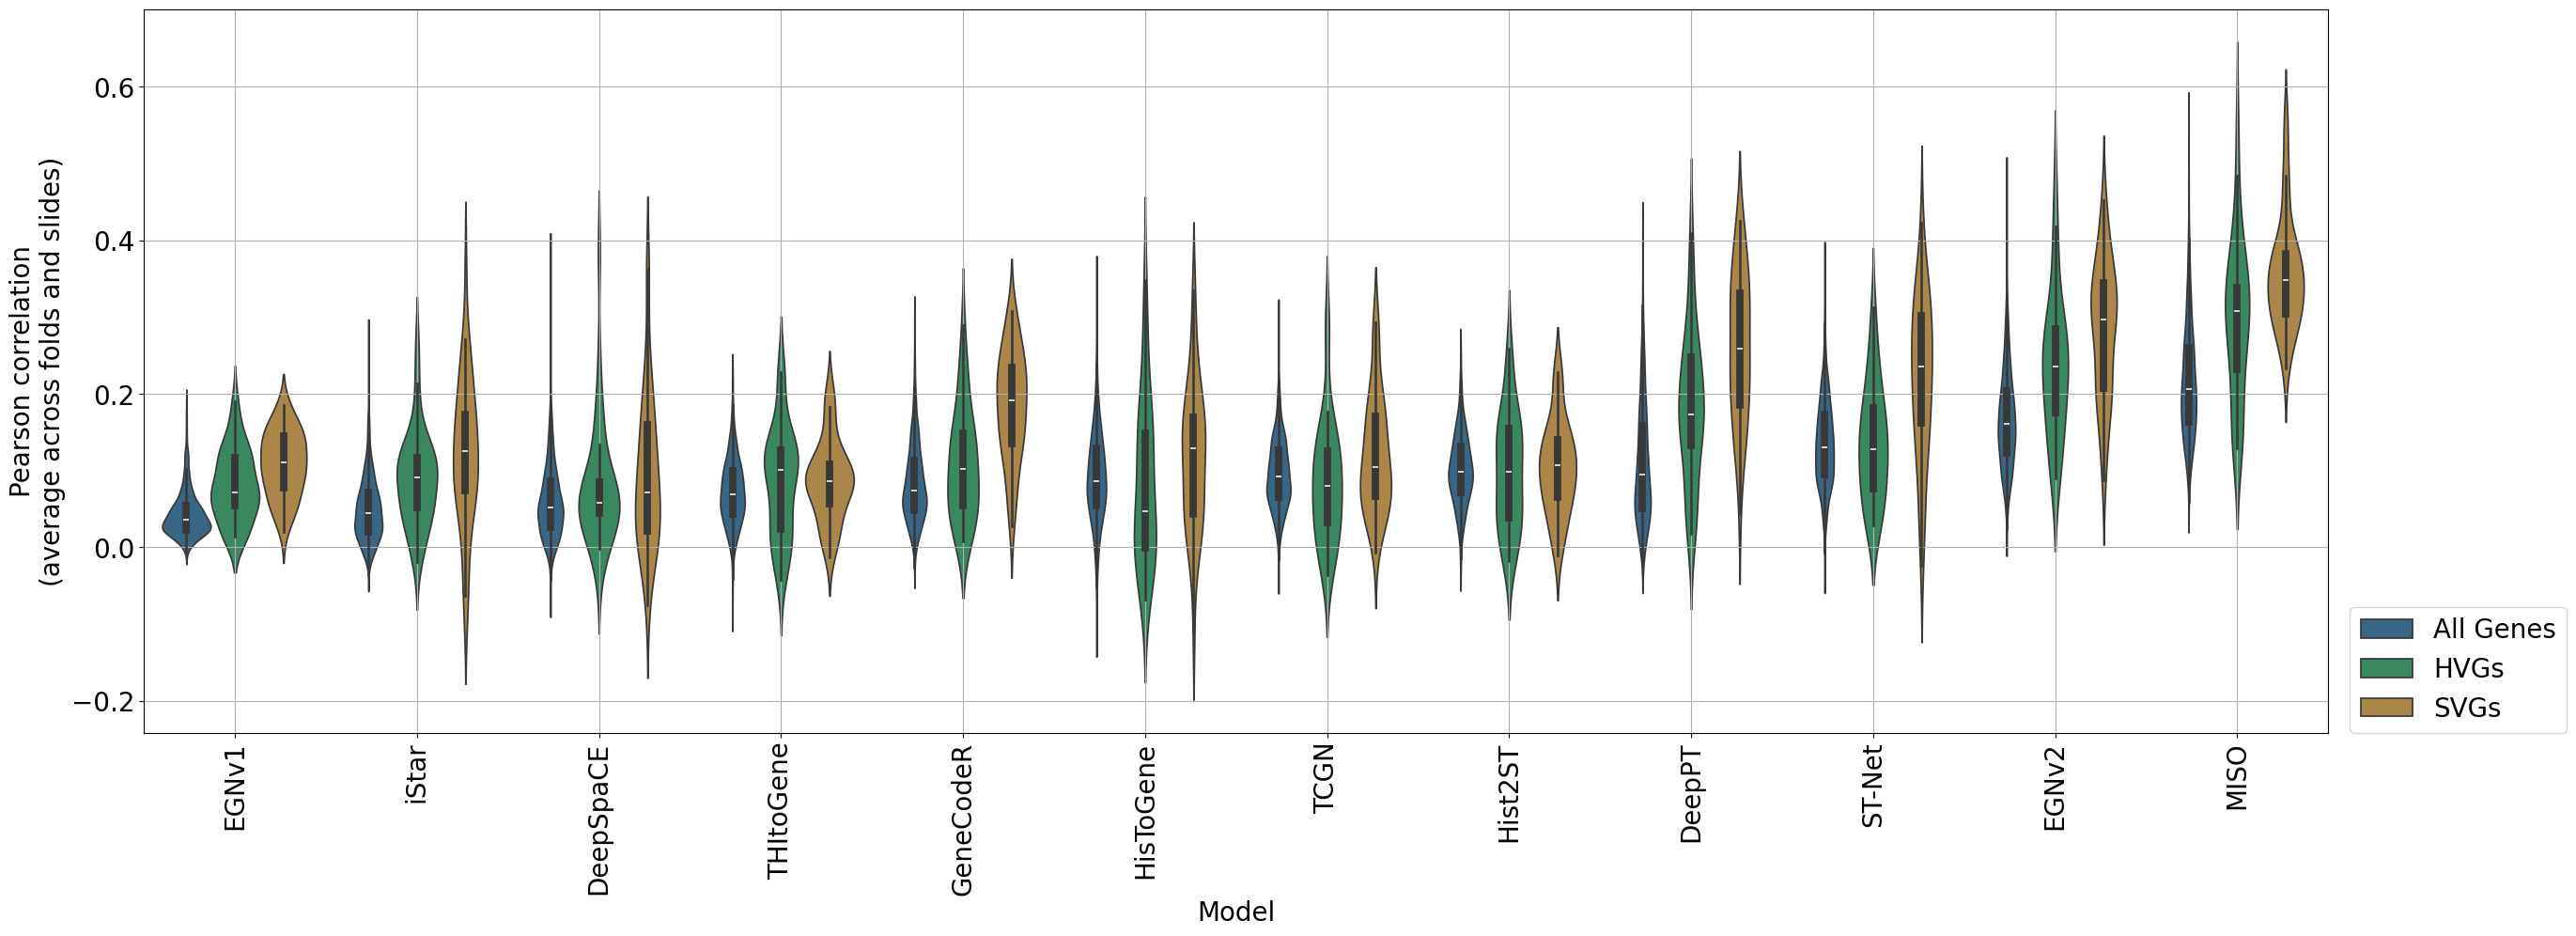

In [99]:
plt.figure(figsize=(30,10))
ax = sns.violinplot(
    y='correlation',
    x='model',
    hue='gene_set',
    order=df.groupby('model').mean(numeric_only=True).sort_values('correlation').index,
    data=df,
    saturation=0.4,
    palette=[
        COLORS["blue"],
        COLORS["bluish_green"],
        COLORS["orange"]
    ],
    dodge=True,
)

plt.ylabel('Pearson correlation\n(average across folds and slides)', fontsize=20)
plt.xlabel('Model', fontsize=20)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.legend(fontsize=20, loc=(1.01, 0.0))
plt.grid()
plt.xlim(-0.5, 11.5)
plt.show()

In [100]:
sort_idx = df.groupby('model')['correlation'].mean().sort_values(ascending=False).index
df.drop('gene', axis=1).groupby(['model', 'gene_set']).agg(['mean', 'std', 'count']).loc[sort_idx]

correlation                
                           mean       std count
model     gene_set                             
MISO      All Genes    0.216842  0.074301   785
          HVGs         0.295210  0.103495    30
          SVGs         0.355342  0.072247    40
EGNv2     All Genes    0.167784  0.063947   785
          HVGs         0.236209  0.093656    30
          SVGs         0.283919  0.087752    40
ST-Net    All Genes    0.135912  0.055622   785
          HVGs         0.137041  0.076176    30
          SVGs         0.219859  0.104237    40
DeepPT    All Genes    0.109779  0.077001   785
          HVGs         0.181641  0.096315    30
          SVGs         0.261086  0.095436    40
Hist2ST   All Genes    0.102075  0.046326   785
          HVGs         0.099261  0.075197    30
          SVGs         0.103972  0.060668    40
TCGN      All Genes    0.095730  0.045849   785
          HVGs         0.084595  0.079657    30
          SVGs         0.120987  0.075171    40
HisToGene All Genes    0.091676  0.058730   785
          HVGs         0.083972  0.106881    30
          SVGs         0.116979  0.093426    40
GeneCodeR All Genes    0.083998  0.050913   785
          HVGs         0.108789  0.072644    30
          SVGs         0.185038  0.070625    40
THItoGene All Genes    0.072754  0.043955   785
          HVGs         0.085741  0.071319    30
          SVGs         0.086898  0.052443    40
DeepSpaCE All Genes    0.060764  0.049644   785
          HVGs         0.080205  0.080558    30
          SVGs         0.093820  0.098905    40
iStar     All Genes    0.049626  0.040958   785
          HVGs         0.089106  0.061182    30
          SVGs         0.122534  0.093971    40
EGNv1     All Genes    0.043137  0.029519   785
          HVGs         0.080826  0.046262    30
          SVGs         0.108450  0.042663    40